In [15]:
import pandas as pd
from dotenv import load_dotenv
from openai import OpenAI
from anthropic import Anthropic
from src.consts import *

load_dotenv(override=True)
openai = OpenAI()
anthropic = Anthropic() 

In [16]:
import importlib
import src.oracle
importlib.reload(src.oracle)
from src.oracle import generate_oracle_csv

# Regenerate the oracle CSV with improved color category handling
generate_oracle_csv('example_oracle.txt', '../../AllPrintingsCSVFiles/cards.csv', 'output/oracle_output.csv')

Oracle CSV generated: output/oracle_output.csv


In [17]:
# Load the data files
oracle_df = pd.read_csv('output/oracle_output.csv')
legacy_oracle_df = pd.read_csv('ThePauperCube_oracle_with_pt.csv')
print(f"Loaded {len(oracle_df)} cards from oracle_df")
print(f"Columns available: {list(oracle_df.columns)}")
oracle_df.head()

Loaded 450 cards from oracle_df
Columns available: ['name', 'CMC', 'Type', 'Color', 'Color Category', 'Oracle Text', 'tags', 'MTGO ID', 'Power', 'Toughness']


,name,CMC,Type,Color,Color Category,Oracle Text,tags,MTGO ID,Power,Toughness
0,Boros Elite,1,Creature — Human Soldier,W,White,Battalion — Whenever this creature and at leas...,NaN,NaN,1.0,1.0
1,Deftblade Elite,1,Creature — Human Soldier,W,White,"Provoke (Whenever this creature attacks, you m...",NaN,NaN,1.0,1.0
2,Doomed Traveler,1,Creature — Human Soldier,W,White,"When this creature dies, create a 1/1 white Sp...",NaN,NaN,1.0,1.0
3,Elite Vanguard,1,Creature — Human Soldier,W,White,NaN,NaN,NaN,2.0,1.0
4,Faerie Guidemother,1,Creature — Faerie,W,White,Flying,NaN,NaN,1.0,1.0


# Theme Validation
Let's check if we have enough cards available for each theme in our jumpstart cube.

# Deck Construction
Now let's test the deck construction function to build actual jumpstart decks from our themes.

In [18]:
# Test the refactored deck construction function

# Build all jumpstart decks using the new refactored version
from src.construct import construct_jumpstart_decks, print_detailed_deck_analysis, CardConstraints, analyze_deck_composition

# Create constraints with custom target deck size and non-land limits
constraints = CardConstraints(
    target_deck_size=13,
    max_lands_dual=1,
    max_lands_mono=1,
    total_non_land=12,  # All 12 cards should be non-lands
    min_creatures=2,  # Set minimum to 4 for testing
    max_creatures=9
)

print("🚀 Starting deck construction with refactored algorithm...")
deck_dataframes = construct_jumpstart_decks(oracle_df, constraints=constraints)

# Generate analysis first, then print detailed analysis
analysis = analyze_deck_composition(deck_dataframes)
print_detailed_deck_analysis(deck_dataframes, analysis, constraints)

🚀 Starting deck construction with refactored algorithm...
🏗️ CONSTRUCTING JUMPSTART DECKS

🔒 Phase 0: Core card reservation
Ensuring each theme gets its defining cards before general competition...

🎯 White Soldiers: Reserving core cards
  ✅ Boros Elite               |   5.3 pts | Creature — Human Sol...
  ✅ Miner's Guidewing         |   5.3 pts | Creature — Bird
  ✅ Topan Freeblade           |   4.8 pts | Creature — Human Sol...
  ✅ Ainok Bond-Kin            |   4.3 pts | Creature — Dog Soldi...
  📦 Reserved 4 core cards

🎯 White Equipment: Reserving core cards
  ✅ Ancestral Blade           |  11.8 pts | Artifact — Equipment
  ✅ Vulshok Morningstar       |  11.8 pts | Artifact — Equipment
  ✅ Mandibular Kite           |  11.2 pts | Artifact — Equipment
  ✅ Greatsword of Tyr         |  11.2 pts | Artifact — Equipment
  ✅ Flayer Husk               |  11.2 pts | Artifact — Equipment
  📦 Reserved 5 core cards

🎯 White Angels: Reserving core cards
  ✅ Combat Professor          |   6.8 pts 

In [19]:
from src.export import export_cube_to_csv


export_cube_to_csv(deck_dataframes, 'jumpstart_decks.csv', oracle_df)

Exporting jumpstart cube to jumpstart_decks.csv...
Adding 60 unassigned cards...
✅ Successfully exported 450 cards to jumpstart_decks.csv

📊 Export Summary:
Total cards: 450
Assigned cards: 390
Unassigned cards: 60
Number of decks: 30

Deck breakdown:
  Green Elves: 13 cards
  Simic Ramp Control: 13 cards
  Boros Aggro: 13 cards
  Golgari Graveyard Value: 13 cards
  Izzet Spells Matter: 13 cards
  Orzhov Lifegain Value: 13 cards
  Selesnya Value: 13 cards
  Gruul Midrange: 13 cards
  Rakdos Aggro: 13 cards
  Dimir Mill: 13 cards
  Unassigned: 60 cards
  ... and 20 more decks


'jumpstart_decks.csv'

In [20]:
# Import validation functions and run card uniqueness validation
from src.validation import validate_card_uniqueness, validate_deck_constraints, validate_jumpstart_cube, display_validation_summary

# Run the validation
# validation_result = validate_card_uniqueness(deck_dataframes)
validate_jumpstart_cube(deck_dataframes, oracle_df, ALL_THEMES, constraints)

🎯 COMPREHENSIVE JUMPSTART CUBE VALIDATION
🔍 VALIDATING CARD UNIQUENESS
📊 VALIDATION RESULTS:
Total cards across all decks: 390
Unique cards used: 390
Duplicate cards found: 0

✅ VALIDATION PASSED!
All 390 cards are used exactly once.
🔍 VALIDATING DECK CONSTRAINTS
📊 CONSTRAINT VALIDATION RESULTS:
Valid decks: 30/30
Constraint violations: 0

✅ ALL CONSTRAINTS SATISFIED!

📈 CARD DISTRIBUTION ANALYSIS
📊 OVERALL STATISTICS:
Total cards available: 450
Total cards used: 390
Cards unused: 60
Usage rate: 86.7%

🎨 USAGE BY COLOR:
  White    :  63/ 70 cards ( 90.0%)
  Blue     :  62/ 67 cards ( 92.5%)
  Black    :  57/ 67 cards ( 85.1%)
  Red      :  62/ 67 cards ( 92.5%)
  Green    :  60/ 67 cards ( 89.6%)
  Colorless:  51/ 74 cards ( 68.9%)

🎯 DECK COMPLETENESS:
Complete decks (13 cards): 30
Incomplete decks: 0

📋 UNUSED CARDS ANALYSIS:
Unused creatures: 10
Unused lands: 23
Unused spells: 27

Sample unused cards:
  • Alabaster Host Intercessor (Creature — Phyrexian Samurai) - W
  • Borrowed Gra

{'overall_valid': True,
 'uniqueness': {'valid': True,
  'total_cards': 390,
  'unique_cards': 390,
  'duplicates': {},
  'duplicate_count': 0,
  'extra_instances': 0},
 'constraints': {'valid': True,
  'valid_decks': 30,
  'total_decks': 30,
  'violations': []},
 'distribution': {'total_available': 450,
  'total_used': 390,
  'unused_count': 60,
  'usage_rate': 0.8666666666666667,
  'color_stats': {'W': {'used': 63, 'available': 70, 'rate': 90.0},
   'U': {'used': 62, 'available': 67, 'rate': 92.53731343283582},
   'B': {'used': 57, 'available': 67, 'rate': 85.07462686567165},
   'R': {'used': 62, 'available': 67, 'rate': 92.53731343283582},
   'G': {'used': 60, 'available': 67, 'rate': 89.55223880597015},
   'C': {'used': 51, 'available': 74, 'rate': 68.91891891891892}},
  'complete_decks': 30,
  'incomplete_decks': []}}

In [21]:
# Additional analysis using the imported validation functions
from src.validation import analyze_card_distribution

# Run the distribution analysis
distribution_analysis = analyze_card_distribution(deck_dataframes, oracle_df, constraints)


📈 CARD DISTRIBUTION ANALYSIS
📊 OVERALL STATISTICS:
Total cards available: 450
Total cards used: 390
Cards unused: 60
Usage rate: 86.7%

🎨 USAGE BY COLOR:
  White    :  63/ 70 cards ( 90.0%)
  Blue     :  62/ 67 cards ( 92.5%)
  Black    :  57/ 67 cards ( 85.1%)
  Red      :  62/ 67 cards ( 92.5%)
  Green    :  60/ 67 cards ( 89.6%)
  Colorless:  51/ 74 cards ( 68.9%)

🎯 DECK COMPLETENESS:
Complete decks (13 cards): 30
Incomplete decks: 0

📋 UNUSED CARDS ANALYSIS:
Unused creatures: 10
Unused lands: 23
Unused spells: 27

Sample unused cards:
  • Alabaster Host Intercessor (Creature — Phyrexian Samurai) - W
  • Borrowed Grace (Instant) - W
  • Settle Beyond Reality (Sorcery) - W
  • Oblivion Ring (Enchantment) - W
  • Faith's Fetters (Enchantment — Aura) - W
  • Sword Coast Serpent (Creature — Serpent Dragon) - U
  • Bubble Snare (Enchantment — Aura) - U
  • Unable to Scream (Enchantment — Aura) - U
  • Weakstone's Subjugation (Enchantment — Aura) - U
  • Witness Protection (Enchantment 

In [22]:
# Compute metrics for all decks\n
from src.balance import compute_all_deck_metrics
metrics_df = compute_all_deck_metrics(deck_dataframes, ALL_THEMES)
metrics_df.set_index('theme', inplace=True)
metrics_df.head()


,avg_cmc,type_creature,type_—,type_human,type_soldier,type_bird,type_dog,type_kithkin,type_soltari,type_instant,...,type_spider,type_thrull,type_imp,type_nomad,type_arcane,type_hag,type_leech,type_mutant,type_cartouche,type_turtle
theme,,,,,,,,,,,,,,,,,,,,,
White Soldiers,1.153846,0.230769,0.230769,0.128205,0.205128,0.025641,0.025641,0.025641,0.025641,0.076923,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
White Equipment,2.000000,0.159091,0.272727,0.090909,0.090909,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
White Angels,3.846154,0.225000,0.250000,0.025000,0.025000,0.050000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
White Weenies,1.384615,0.186047,0.255814,0.116279,0.046512,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Blue Flying,2.692308,0.236842,0.263158,NaN,NaN,0.105263,NaN,NaN,NaN,0.078947,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


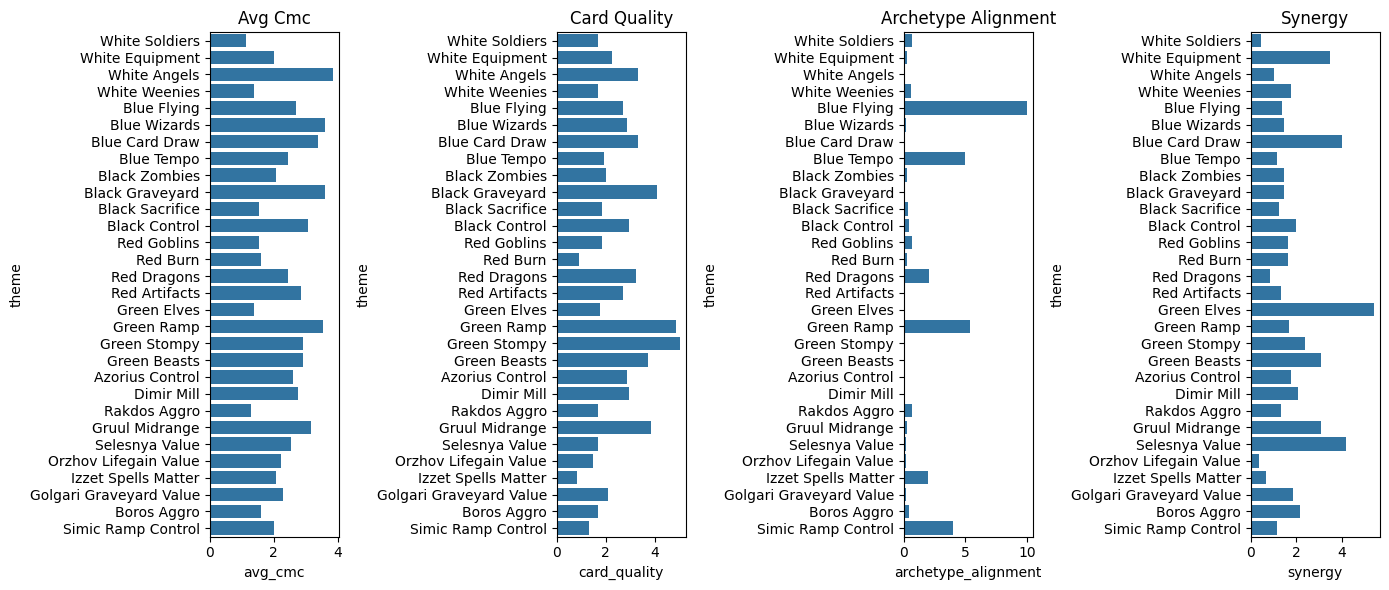

In [23]:
# Bar plots for key metrics
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(14, 6))
for i, metric in enumerate(['avg_cmc', 'card_quality', 'archetype_alignment', 'synergy']):
    plt.subplot(1, 4, i+1)
    sns.barplot(y=metrics_df.index, x=metrics_df[metric], orient='h')
    plt.title(metric.replace('_', ' ').title())
    plt.tight_layout()
plt.show()

In [24]:
# Import plotly for interactive visualizations
import plotly.graph_objects as go

sample_themes = metrics_df.index[:]  # Show first 5 decks as example
radar_metrics = ['avg_cmc', 'card_quality', 'archetype_alignment', 'synergy', 'keyword_density']
fig = go.Figure()
for theme in sample_themes:
    values = metrics_df.loc[theme, radar_metrics].values.tolist()
    fig.add_trace(go.Scatterpolar(
        r=values + [values[0]],
        theta=radar_metrics + [radar_metrics[0]],
        fill='toself',
        name=theme
    ))
fig.update_layout(
    polar=dict(radialaxis=dict(visible=True)),
    showlegend=True,
    title='Deck Balance Radar Chart (Sample)'
)
fig.show()

# CMC Curve Analysis
Let's visualize the Converted Mana Cost (CMC) curves for each deck to understand their mana distribution and speed.

In [25]:
# Calculate CMC curves for all decks
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from collections import Counter

def calculate_cmc_curve(deck_df):
    """Calculate the CMC distribution for a deck."""
    # Only count non-land cards for CMC curve
    non_lands = deck_df[deck_df['Type'].str.contains('Land', na=False) == False]
    cmc_counts = Counter(non_lands['CMC'])
    
    # Create a full range from 0 to max CMC
    max_cmc = max(cmc_counts.keys()) if cmc_counts else 0
    cmc_curve = [cmc_counts.get(i, 0) for i in range(max_cmc + 1)]
    
    return cmc_curve, non_lands

# Calculate CMC curves for all decks
cmc_data = {}
deck_stats = {}

for theme_name, deck_df in deck_dataframes.items():
    cmc_curve, non_lands = calculate_cmc_curve(deck_df)
    cmc_data[theme_name] = cmc_curve
    deck_stats[theme_name] = {
        'avg_cmc': non_lands['CMC'].mean() if len(non_lands) > 0 else 0,
        'total_cards': len(deck_df),
        'non_lands': len(non_lands),
        'lands': len(deck_df) - len(non_lands)
    }

print("CMC curve data calculated for all decks!")
print(f"Sample stats for first deck ({list(deck_stats.keys())[0]}):")
first_deck = list(deck_stats.keys())[0]
print(f"  Average CMC: {deck_stats[first_deck]['avg_cmc']:.2f}")
print(f"  Total cards: {deck_stats[first_deck]['total_cards']}")
print(f"  Non-land cards: {deck_stats[first_deck]['non_lands']}")
print(f"  Lands: {deck_stats[first_deck]['lands']}")

CMC curve data calculated for all decks!
Sample stats for first deck (White Soldiers):
  Average CMC: 1.25
  Total cards: 13
  Non-land cards: 12
  Lands: 1


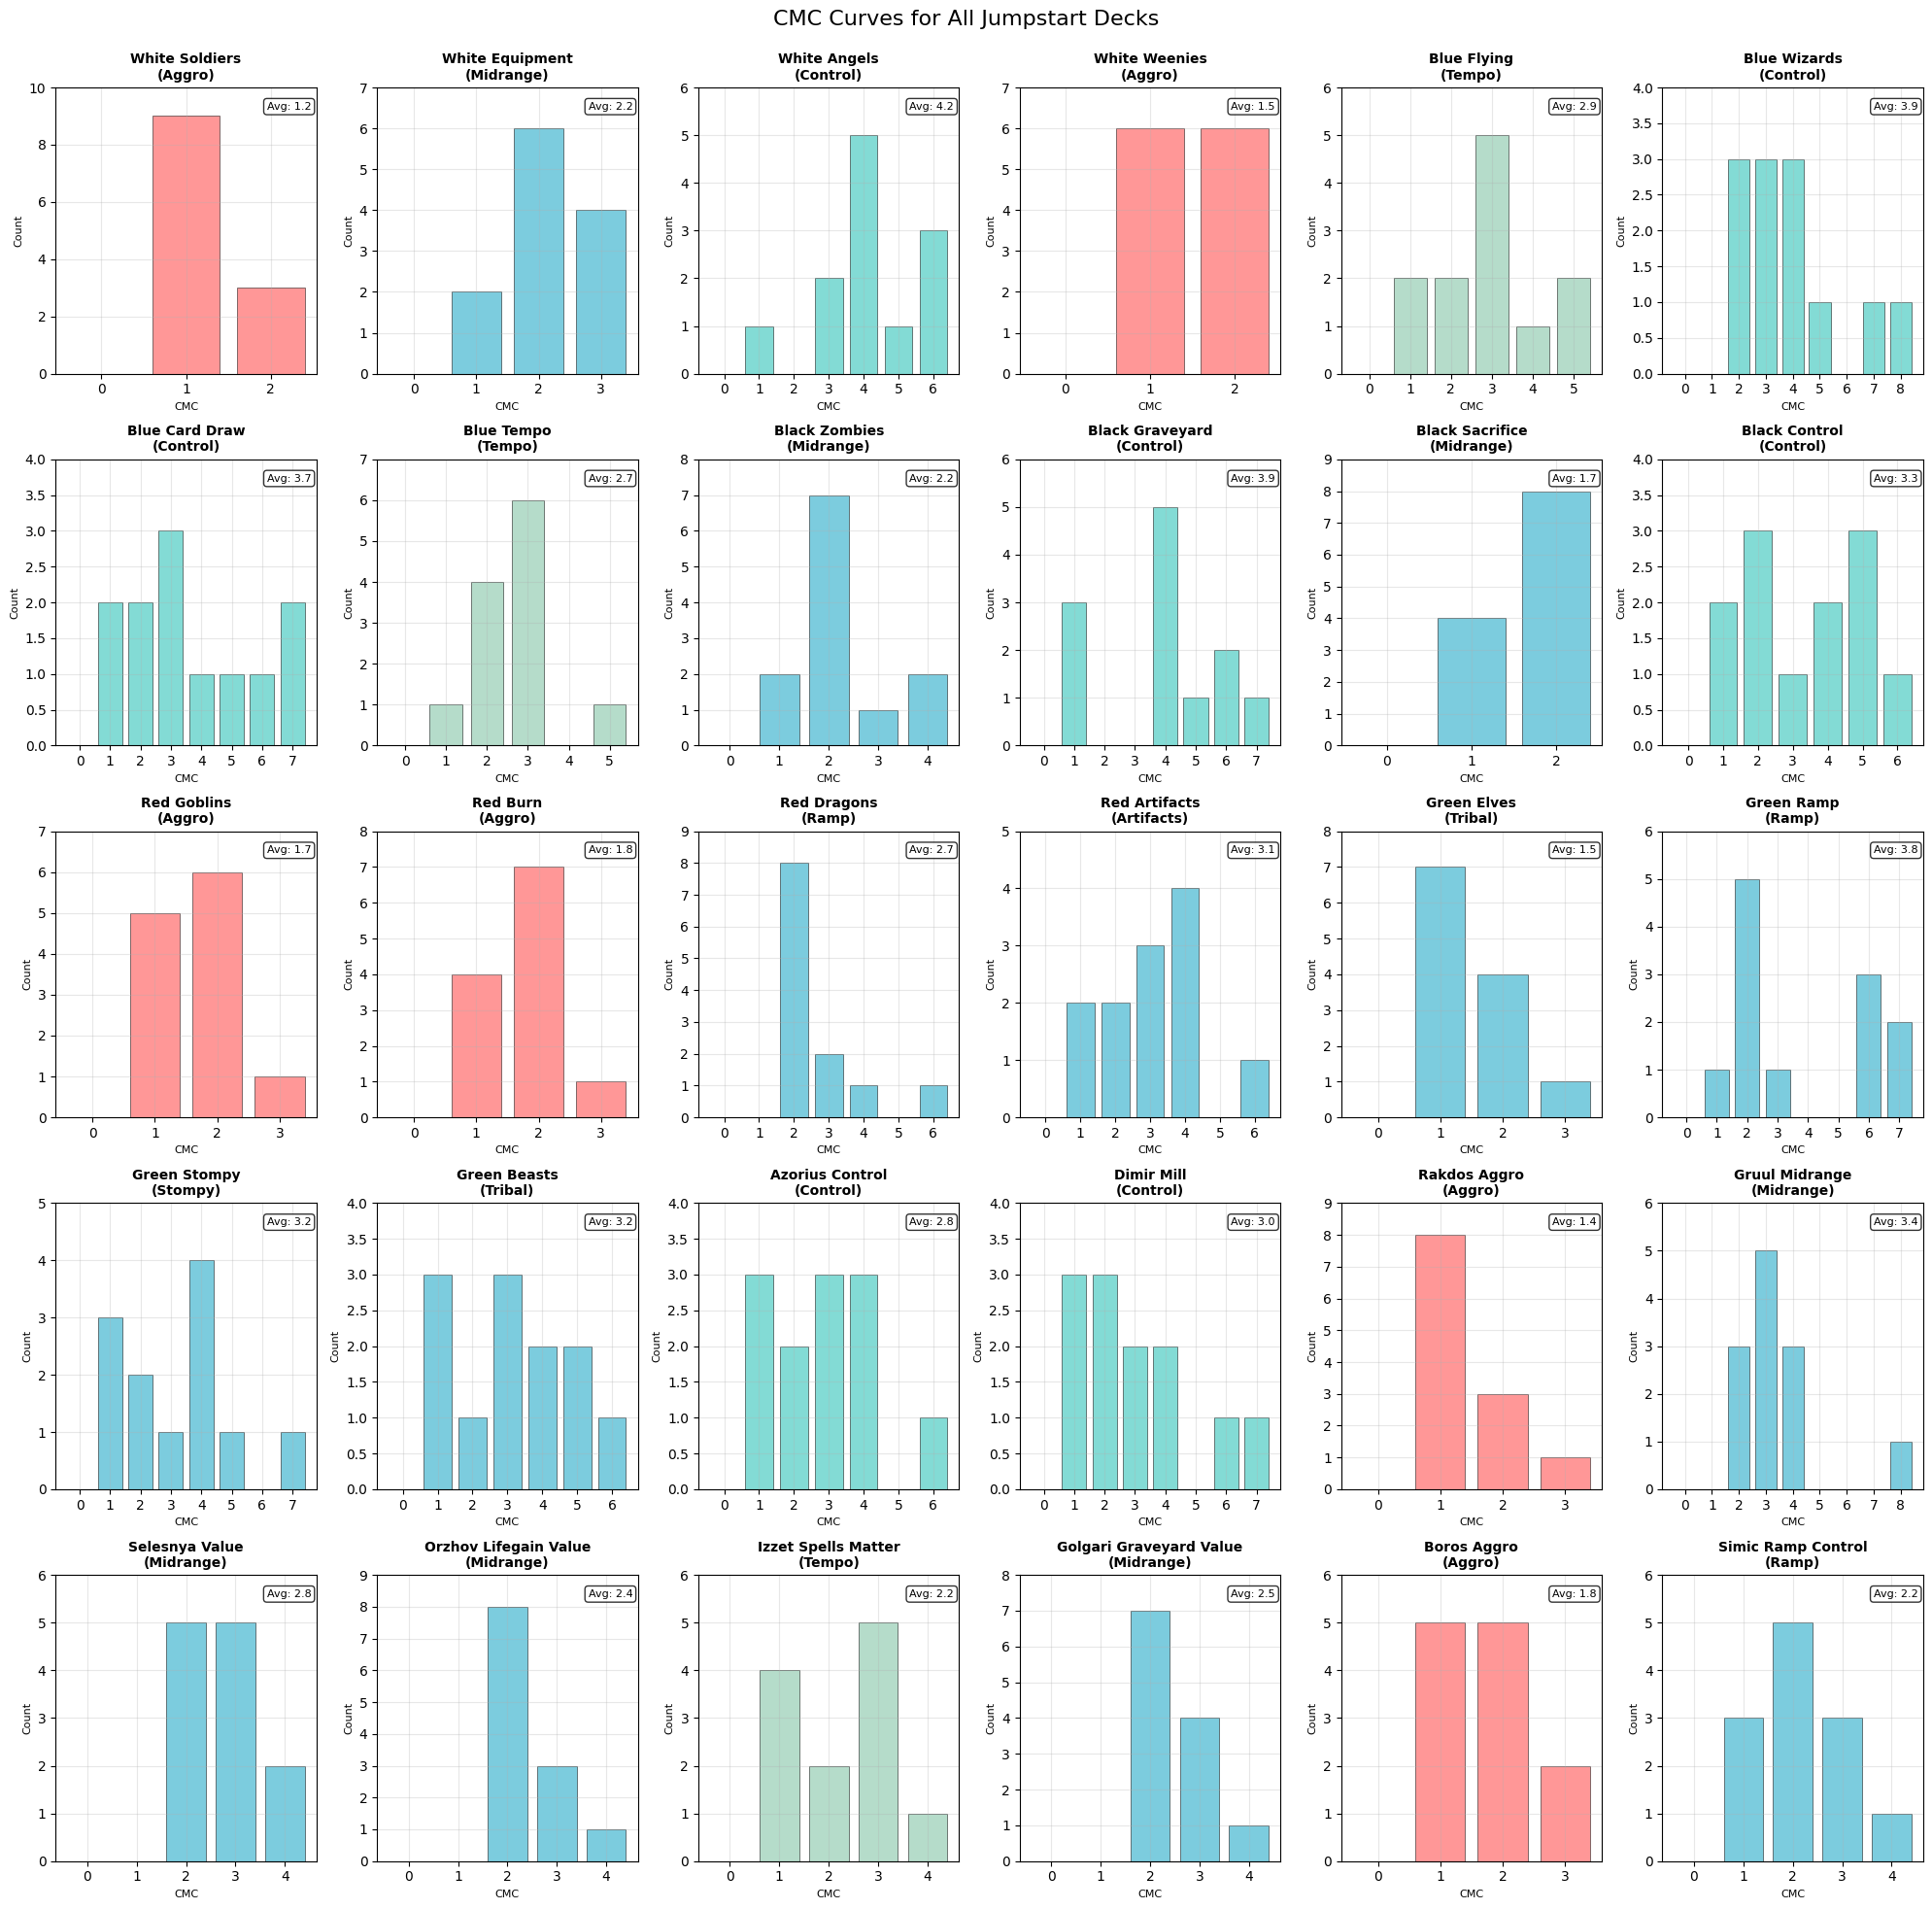

✅ CMC curves plotted for all 30 decks!
Color legend:
  Aggro: #FF6B6B
  Control: #4ECDC4
  Midrange: #45B7D1
  Tempo: #96CEB4
  Combo: #FFEAA7


In [26]:
# Create a large grid plot showing CMC curves for all decks
plt.style.use('default')
num_decks = len(deck_dataframes)
cols = 6  # 6 columns
rows = (num_decks + cols - 1) // cols  # Calculate needed rows

fig, axes = plt.subplots(rows, cols, figsize=(20, 4 * rows))
fig.suptitle('CMC Curves for All Jumpstart Decks', fontsize=16, y=0.98)

# Flatten axes for easy iteration
if rows == 1:
    axes = [axes] if cols == 1 else axes
else:
    axes = axes.flatten()

# Color scheme for different archetypes
archetype_colors = {
    'Aggro': '#FF6B6B',
    'Control': '#4ECDC4', 
    'Midrange': '#45B7D1',
    'Tempo': '#96CEB4',
    'Combo': '#FFEAA7'
}

for i, (theme_name, deck_df) in enumerate(deck_dataframes.items()):
    ax = axes[i]
    
    # Get CMC curve and deck info
    cmc_curve, non_lands = calculate_cmc_curve(deck_df)
    
    # Determine archetype for coloring
    archetype = 'Midrange'  # Default
    if theme_name in ALL_THEMES:
        archetype = ALL_THEMES[theme_name].get('archetype', 'Midrange')
    
    color = archetype_colors.get(archetype, '#45B7D1')
    
    # Plot the CMC curve
    x_values = list(range(len(cmc_curve)))
    ax.bar(x_values, cmc_curve, color=color, alpha=0.7, edgecolor='black', linewidth=0.5)
    
    # Customize each subplot
    ax.set_title(f'{theme_name}\n({archetype})', fontsize=10, fontweight='bold')
    ax.set_xlabel('CMC', fontsize=8)
    ax.set_ylabel('Count', fontsize=8)
    ax.set_xticks(x_values)
    ax.grid(True, alpha=0.3)
    
    # Add average CMC as text
    avg_cmc = non_lands['CMC'].mean() if len(non_lands) > 0 else 0
    ax.text(0.98, 0.95, f'Avg: {avg_cmc:.1f}', transform=ax.transAxes, 
            ha='right', va='top', fontsize=8, 
            bbox=dict(boxstyle='round,pad=0.3', facecolor='white', alpha=0.8))
    
    # Set consistent y-axis limits
    ax.set_ylim(0, max(max(cmc_curve), 1) + 1)

# Hide empty subplots
for i in range(num_decks, len(axes)):
    axes[i].set_visible(False)

plt.tight_layout()
plt.subplots_adjust(top=0.94)
plt.show()

print(f"✅ CMC curves plotted for all {num_decks} decks!")
print("Color legend:")
for archetype, color in archetype_colors.items():
    print(f"  {archetype}: {color}")

In [27]:
# Summary statistics and comparison plots
print("📊 CMC CURVE SUMMARY STATISTICS")
print("="*50)

# Create a DataFrame with CMC statistics
cmc_summary = []
for theme_name, stats in deck_stats.items():
    archetype = ALL_THEMES.get(theme_name, {}).get('archetype', 'Midrange')
    cmc_summary.append({
        'Theme': theme_name,
        'Archetype': archetype,
        'Avg_CMC': stats['avg_cmc'],
        'Total_Cards': stats['total_cards'],
        'Non_Lands': stats['non_lands'],
        'Lands': stats['lands']
    })

cmc_summary_df = pd.DataFrame(cmc_summary)
cmc_summary_df = cmc_summary_df.sort_values('Avg_CMC')

print("Top 5 Fastest Decks (Lowest Average CMC):")
print(cmc_summary_df.head()[['Theme', 'Archetype', 'Avg_CMC']].to_string(index=False))

print("\nTop 5 Slowest Decks (Highest Average CMC):")
print(cmc_summary_df.tail()[['Theme', 'Archetype', 'Avg_CMC']].to_string(index=False))

print(f"\nOverall Statistics:")
print(f"Average CMC across all decks: {cmc_summary_df['Avg_CMC'].mean():.2f}")
print(f"CMC Standard Deviation: {cmc_summary_df['Avg_CMC'].std():.2f}")
print(f"Fastest deck: {cmc_summary_df.iloc[0]['Theme']} ({cmc_summary_df.iloc[0]['Avg_CMC']:.2f})")
print(f"Slowest deck: {cmc_summary_df.iloc[-1]['Theme']} ({cmc_summary_df.iloc[-1]['Avg_CMC']:.2f})")

📊 CMC CURVE SUMMARY STATISTICS
Top 5 Fastest Decks (Lowest Average CMC):
         Theme Archetype  Avg_CMC
White Soldiers     Aggro 1.250000
  Rakdos Aggro     Aggro 1.416667
   Green Elves    Tribal 1.500000
 White Weenies     Aggro 1.500000
   Red Goblins     Aggro 1.666667

Top 5 Slowest Decks (Highest Average CMC):
          Theme Archetype  Avg_CMC
 Blue Card Draw   Control 3.666667
     Green Ramp      Ramp 3.833333
   Blue Wizards   Control 3.916667
Black Graveyard   Control 3.916667
   White Angels   Control 4.166667

Overall Statistics:
Average CMC across all decks: 2.62
CMC Standard Deviation: 0.84
Fastest deck: White Soldiers (1.25)
Slowest deck: White Angels (4.17)


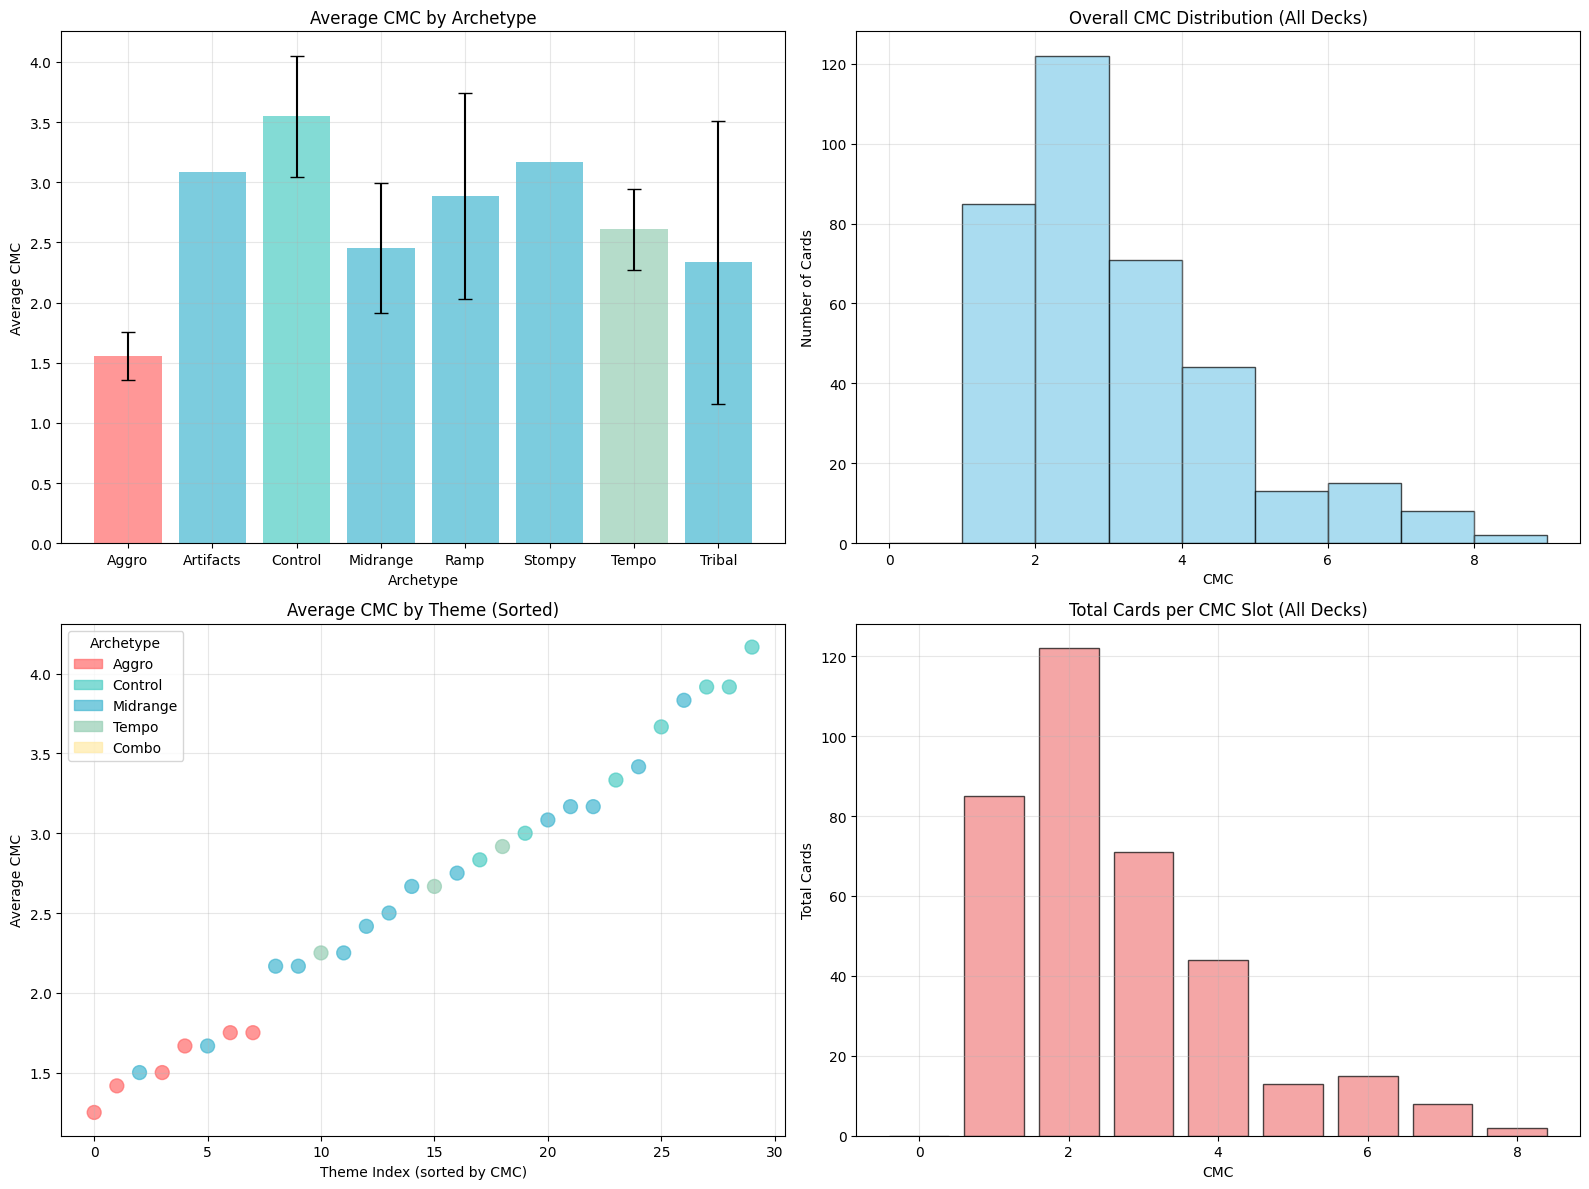

✅ CMC analysis complete! The visualizations show:
  📈 Individual deck curves with archetype coloring
  📊 Statistical summaries and comparisons
  🎯 Archetype-based CMC patterns
  📋 Overall cube CMC distribution


In [28]:
# Archetype comparison plots
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(16, 12))

# 1. Average CMC by Archetype
archetype_cmc = cmc_summary_df.groupby('Archetype')['Avg_CMC'].agg(['mean', 'std', 'count'])
ax1.bar(archetype_cmc.index, archetype_cmc['mean'], 
        yerr=archetype_cmc['std'], capsize=5, alpha=0.7,
        color=[archetype_colors.get(arch, '#45B7D1') for arch in archetype_cmc.index])
ax1.set_title('Average CMC by Archetype')
ax1.set_ylabel('Average CMC')
ax1.set_xlabel('Archetype')
ax1.grid(True, alpha=0.3)

# 2. CMC Distribution (all decks combined)
all_cmcs = []
for theme_name, deck_df in deck_dataframes.items():
    non_lands = deck_df[deck_df['Type'].str.contains('Land', na=False) == False]
    all_cmcs.extend(non_lands['CMC'].tolist())

ax2.hist(all_cmcs, bins=range(max(all_cmcs) + 2), alpha=0.7, color='skyblue', edgecolor='black')
ax2.set_title('Overall CMC Distribution (All Decks)')
ax2.set_xlabel('CMC')
ax2.set_ylabel('Number of Cards')
ax2.grid(True, alpha=0.3)

# 3. Average CMC scatter plot by theme
colors = [archetype_colors.get(ALL_THEMES.get(theme, {}).get('archetype', 'Midrange'), '#45B7D1') 
          for theme in cmc_summary_df['Theme']]
ax3.scatter(range(len(cmc_summary_df)), cmc_summary_df['Avg_CMC'], 
           c=colors, alpha=0.7, s=100)
ax3.set_title('Average CMC by Theme (Sorted)')
ax3.set_xlabel('Theme Index (sorted by CMC)')
ax3.set_ylabel('Average CMC')
ax3.grid(True, alpha=0.3)

# Add archetype legend
handles = [plt.Rectangle((0,0),1,1, color=color, alpha=0.7) 
           for archetype, color in archetype_colors.items()]
labels = list(archetype_colors.keys())
ax3.legend(handles, labels, title='Archetype', loc='upper left')

# 4. Cards per CMC slot comparison
cmc_slots = {}
max_cmc = max(all_cmcs)
for cmc in range(max_cmc + 1):
    cmc_slots[cmc] = sum(1 for c in all_cmcs if c == cmc)

ax4.bar(cmc_slots.keys(), cmc_slots.values(), alpha=0.7, color='lightcoral', edgecolor='black')
ax4.set_title('Total Cards per CMC Slot (All Decks)')
ax4.set_xlabel('CMC')
ax4.set_ylabel('Total Cards')
ax4.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print("✅ CMC analysis complete! The visualizations show:")
print("  📈 Individual deck curves with archetype coloring")
print("  📊 Statistical summaries and comparisons")
print("  🎯 Archetype-based CMC patterns")
print("  📋 Overall cube CMC distribution")